# Theory of matplotlib

Matplotlib is an open source tool kit for representing and visualizing data. Its based the MATLAB programming environment and borrows many of these elements.

matplotlib has several layers. 

- A **backend** layer, which knows about low level graphics routines it can render to the screen or to a file. 
- And the **artist** layer on top of the backend, which describe how data is arranged and by means of which shapes
- A **scripting** layer creating those artists and choreographs them all together

see http://www.aosabook.org/en/matplotlib.html


### Backend layer

A backend is an abstraction layer which knows how to interact with the operating environment (mac-os, linux, windows etc), whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands. In jupyter notebooks we use the inline backend. 

Jupyter has some specialized support for matplotlib and this is enabled by using the IPython magic `%matplotlib notebook`. It configures matplotlib to render into the browser. 

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl

matplotlib has a lot of **non pythonic** naming conventions, like `get` and `set`. These patterns are more common in java. You can hit Tab though for type hint autocompletion in the Jupyter Notebook. 

### Artist layer

The artist layer is an abstraction around drawing and layout primitives. It ontains containers such as Figure, Subplot, and Axes. It also contains primitives, such as a Line2D and Rectangle, and collections, such as a PathCollection. 
The Artist hierarchy is the middle layer of the matplotlib stack, and is the place where much of the heavy lifting happens. Consider FigureCanvas from the backend as the paper, the Artist is the object that knows how to take the Renderer (the paintbrush) and put ink on the canvas. Everything you see in a matplotlib Figure is an Artist instance (axes, titles, lines etc)

In [3]:
__author__ = 'John Hunter and Michael Droettboom'

# Import the FigureCanvas from the backend of your choice
#  and attach the Figure artist to it.
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

# Import the numpy library to generate the random numbers.
import numpy as np
x = np.random.randn(10000)

# Now use a figure method to create an Axes artist; the Axes artist is
#  added automatically to the figure container fig.axes.
# Here "111" is from the MATLAB convention: create a grid with 1 row and 1
#  column, and use the first cell in that grid for the location of the new
#  Axes.
ax = fig.add_subplot(111)

# Call the Axes method hist to generate the histogram; hist creates a
#  sequence of Rectangle artists for each histogram bar and adds them
#  to the Axes container.  Here "100" means create 100 bins.
ax.hist(x, 100)

# Decorate the figure with a title and save it.
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')

# the backend - the one for the jupiter notebooks -  isn't able to render this directly. 
# It expects the scripting layer pie plot to have created all of the objects. 
# we'll save the figure to a png file instead and do a quick html cell magic and execute that, 
# and see the rendered image.
canvas.print_png('matplotlib_histogram.png')
#fig.savefig('matplotlib_histogram.png')

In [4]:
%%html
<img src = 'graphics/matplotlib_histogram.png' />

### Scripting layter
It simplifies access to the Artist and Backend layers. A common used scripting layer is pyplot

<IPython.core.display.Javascript object>


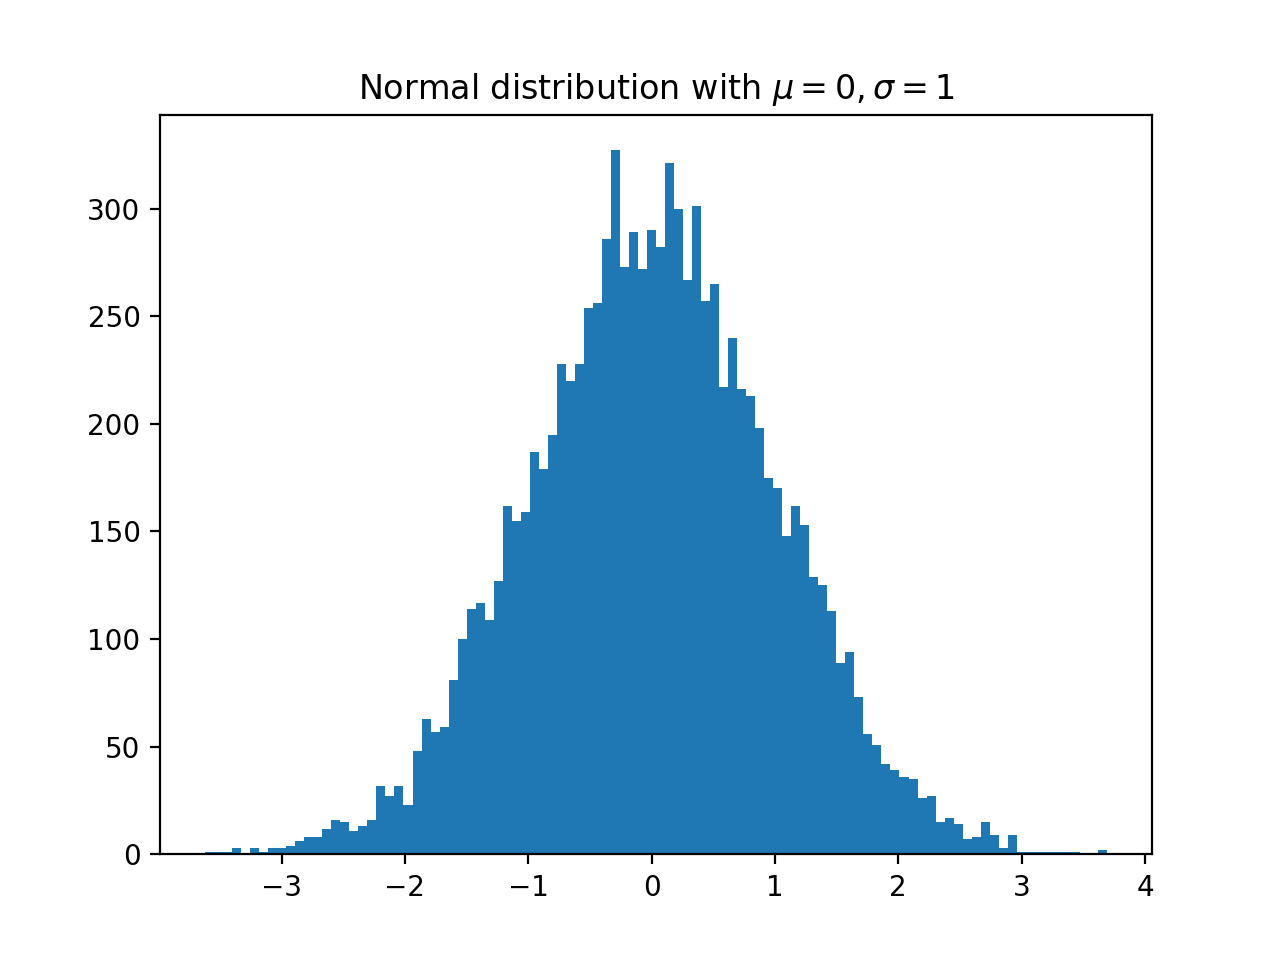

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.show()

### Another example: Basic plots


As you can see the the pyplot scripting interface is managing a lot of objects for you. It keeps track of the latest figure (Figure1), of sub plots and of the axis objects. The pyplot module itself has a function which is called `plot` taking care of redirecting calls to the current axis object.


In [6]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

#create a new figure and assiociate it with the back end
fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.plot(3,4, '.')
canvas.print_png('graphics/test.png')

In [7]:
%%html
<img src = 'graphics/test.png' />

### Overlay artist shapes

You can add artists to an axes object at any time. Pyplot is doing that for us when we call the plot function. It's determining what shape we want from the string, the location associate with that shape, then it's creating a patch object and adding that to the axes. For instance if i add three datapoints to an axes object it will put that on the same figure. The points are rendered in different colors. As the axes object recognizes them as different data series.


<IPython.core.display.Javascript object>


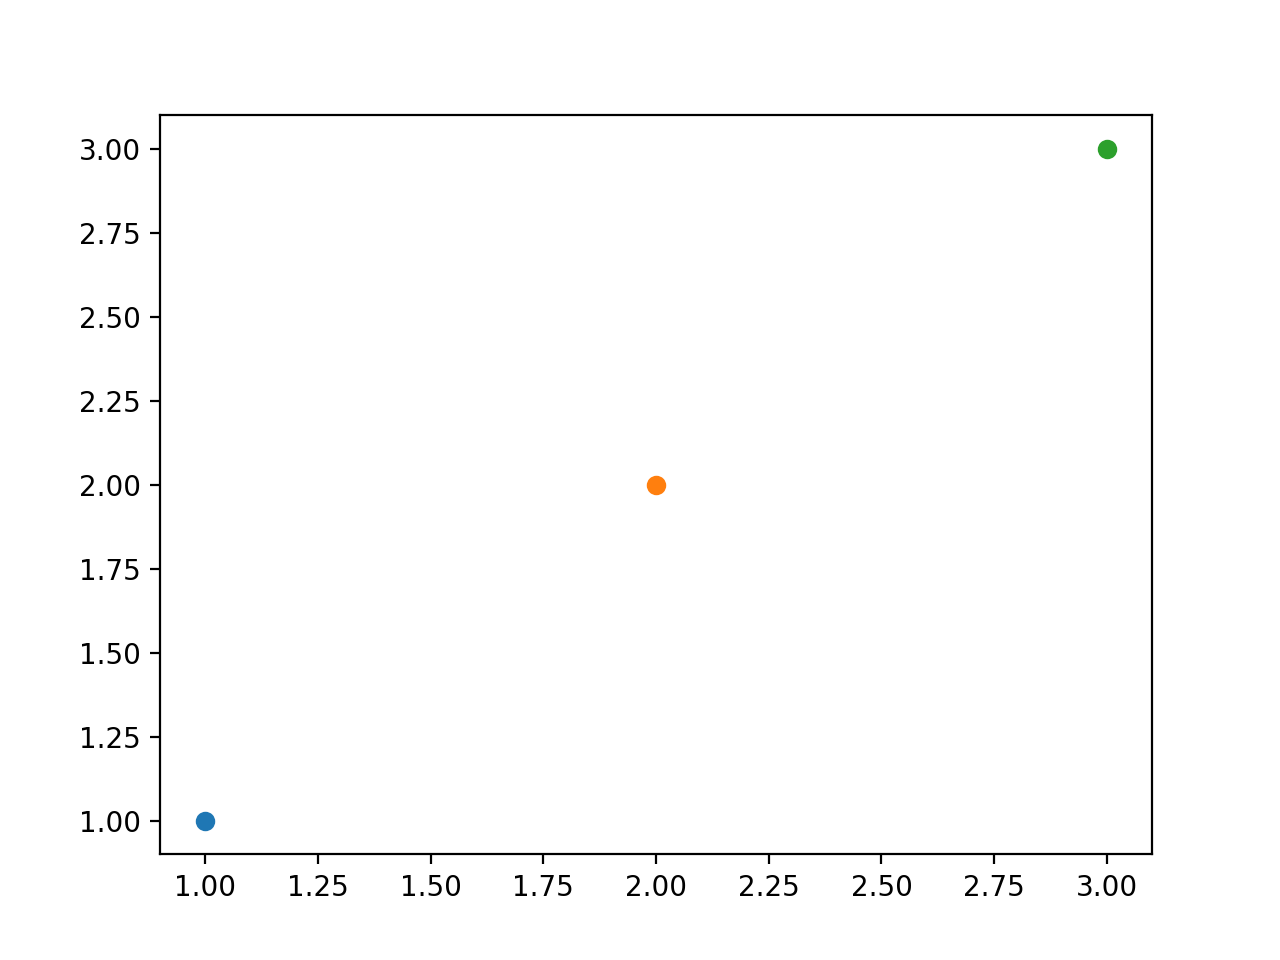

In [8]:
plt.figure()
plt.plot(1,1, 'o')
plt.plot(2,2, 'o')
plt.plot(3,3, 'o')
plt.show()

### Behind the scenes 

In [9]:
ax = plt.gca() #get access to the axes
ax.get_children()

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

We see:
- The three line 2D objects are our data points. 
- The number of spines are actual renderings of the borders of the frame including tic markers
- Two axis objects x and y axis
- Text objects, which are the labels for the chart. 
- A rectangle which is the background for the axis

### Access and change plot features
Pyplot is going to retrieve the current figure with the function `gcf` and then get the current axes with the function `gca`. Pyplot is keeping track of the axes objects for you. However they're there and we can get them when we want to use them or modify them



<IPython.core.display.Javascript object>


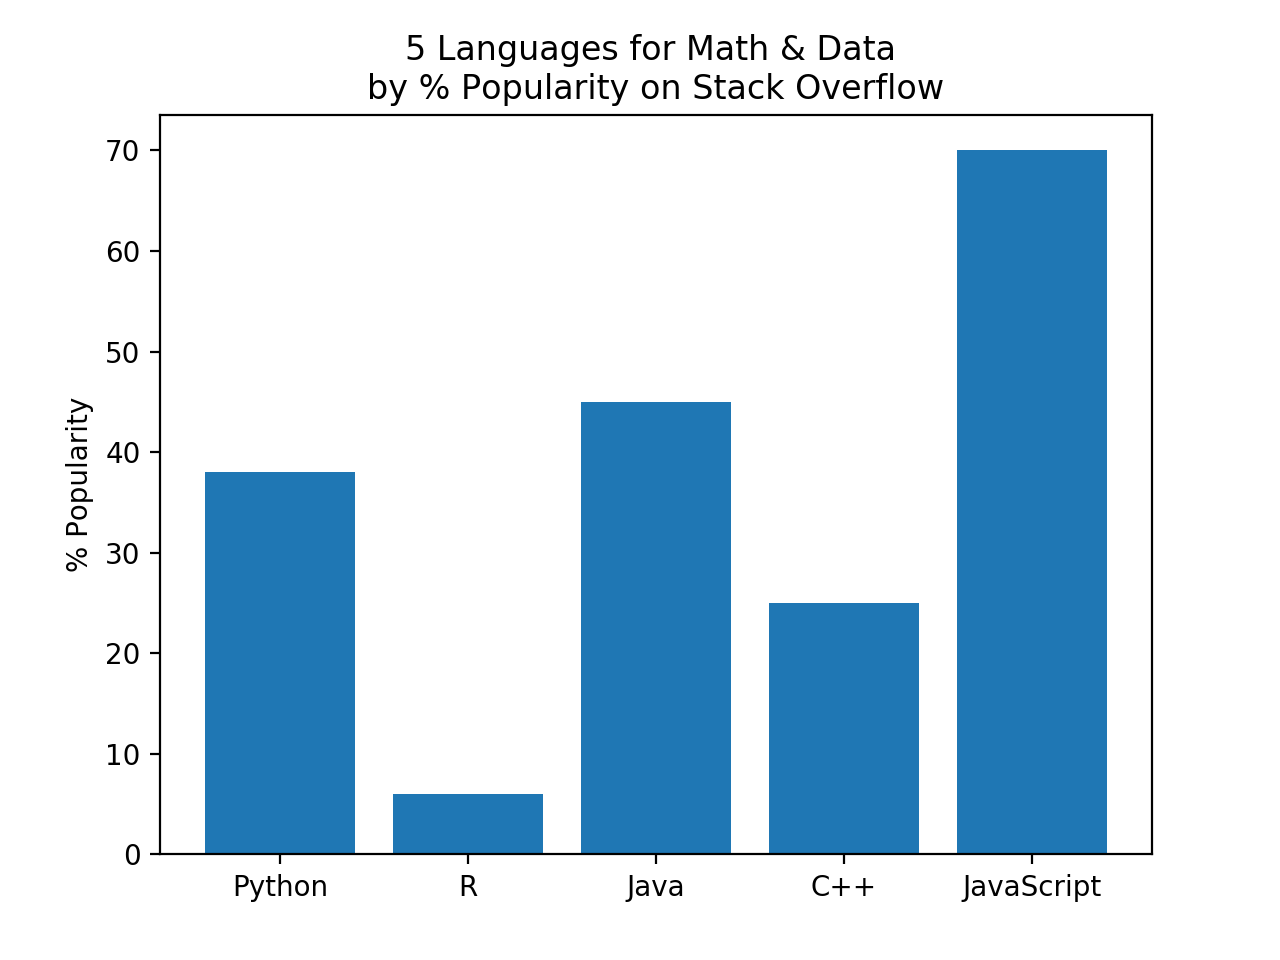

In [10]:
%matplotlib notebook
# Simple script for barplot
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'R', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [38, 6, 45, 25, 70]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('5 Languages for Math & Data \nby % Popularity on Stack Overflow')
 
plt.show()

<IPython.core.display.Javascript object>


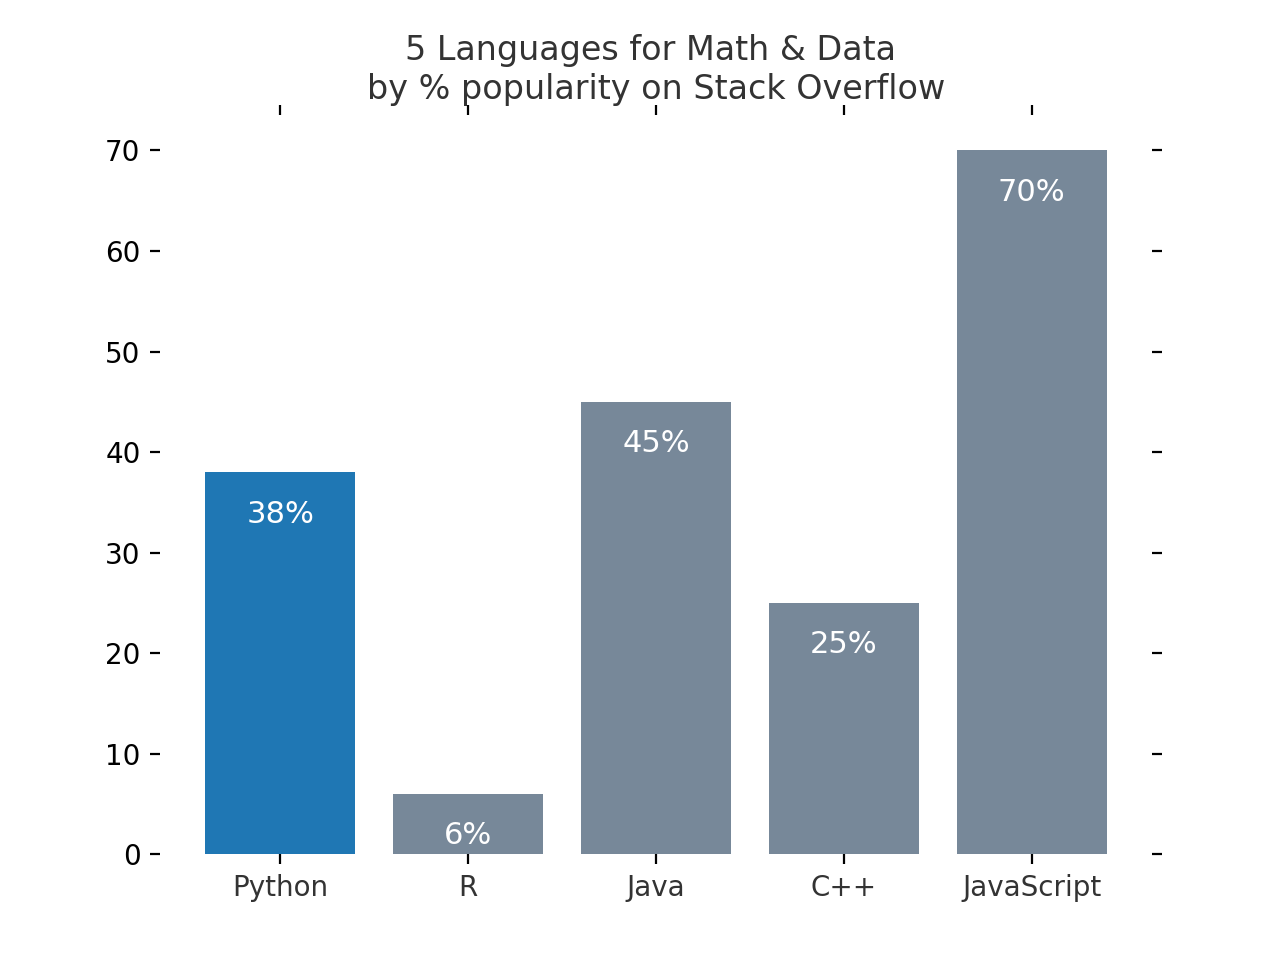

In [11]:
%matplotlib notebook
# Modified script for bar plot
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'R', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [38, 6, 45, 25, 70]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# change one bar, the python bar, to a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(height)) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

### Documentation
Further more, remember that the function declaration from most of the functions in matplotlib end with an open set of keyword arguments. There are a lot of different properties you can control through these keyword arguments. More documentation is to be found on https://matplotlib.org/contents.html and a good cheat sheet is https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf